<a href="https://colab.research.google.com/github/betinhapotter/alura-git/blob/master/site/en/gemini-api/docs/get-started/python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2024 Google LLC.

In [1]:
pip install -q -U google-generativeai

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
# Used to securely store your API key
from google.colab import userdata

In [13]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [18]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [19]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinki

In [20]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [21]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 56.3 ms, sys: 2.49 ms, total: 58.8 ms
Wall time: 3.57 s


In [22]:
to_markdown(response.text)

> There's no single, universally accepted answer to the meaning of life.  It's a question that has been pondered by philosophers, theologians, and individuals for millennia, and the answer is often deeply personal.  Different perspectives include:
> 
> * **Nihilism:**  The belief that life is inherently without meaning or purpose.
> 
> * **Existentialism:** The belief that individuals create their own meaning and purpose through their choices and actions.  There's no preordained meaning; you make it.
> 
> * **Absurdism:** The belief that the search for meaning in a meaningless universe is inherently absurd, but that we should embrace this absurdity.
> 
> * **Religious and spiritual beliefs:** Many religions offer answers about the meaning of life, often involving serving a higher power, following divine commandments, or achieving enlightenment.  These meanings vary widely depending on the specific belief system.
> 
> * **Hedonism:**  The belief that the meaning of life is to maximize pleasure and minimize pain.
> 
> * **Purpose-driven life:** Finding meaning through contributing to something larger than oneself, whether it's a cause, a community, or a family.
> 
> Ultimately, the meaning of life is what you make it.  It's a question of personal values, beliefs, and experiences.  Instead of searching for a definitive answer, many find it more fulfilling to explore their own values and create a life that feels meaningful and purposeful to them.


In [23]:
response.candidates

[content {
  parts {
    text: "There\'s no single, universally accepted answer to the meaning of life.  It\'s a question that has been pondered by philosophers, theologians, and individuals for millennia, and the answer is often deeply personal.  Different perspectives include:\n\n* **Nihilism:**  The belief that life is inherently without meaning or purpose.\n\n* **Existentialism:** The belief that individuals create their own meaning and purpose through their choices and actions.  There\'s no preordained meaning; you make it.\n\n* **Absurdism:** The belief that the search for meaning in a meaningless universe is inherently absurd, but that we should embrace this absurdity.\n\n* **Religious and spiritual beliefs:** Many religions offer answers about the meaning of life, often involving serving a higher power, following divine commandments, or achieving enlightenment.  These meanings vary widely depending on the specific belief system.\n\n* **Hedonism:**  The belief that the meaning o

In [24]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 56.8 ms, sys: 6.02 ms, total: 62.8 ms
Wall time: 4.13 s


In [25]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

There
________________________________________________________________________________
's no single, universally accepted answer to the meaning of life.  The
________________________________________________________________________________
 question itself is philosophical, and the answer is deeply personal and often changes throughout a
________________________________________________________________________________
 person's life.  Different philosophies, religions, and individuals offer diverse perspectives:

* **Nihilism:** This philosophy asserts that life is inherently without
________________________________________________________________________________
 meaning or purpose.

* **Existentialism:**  This emphasizes individual freedom and responsibility.  Meaning isn't inherent; it's created through choices
________________________________________________________________________________
 and actions.

* **Absurdism:**  This acknowledges the conflict between the human search for me

In [26]:
response = model.generate_content("What is the meaning of life?", stream=True)

In [27]:
response.prompt_feedback

In [28]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


In [31]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  4145k      0 --:--:-- --:--:-- --:--:-- 4175k


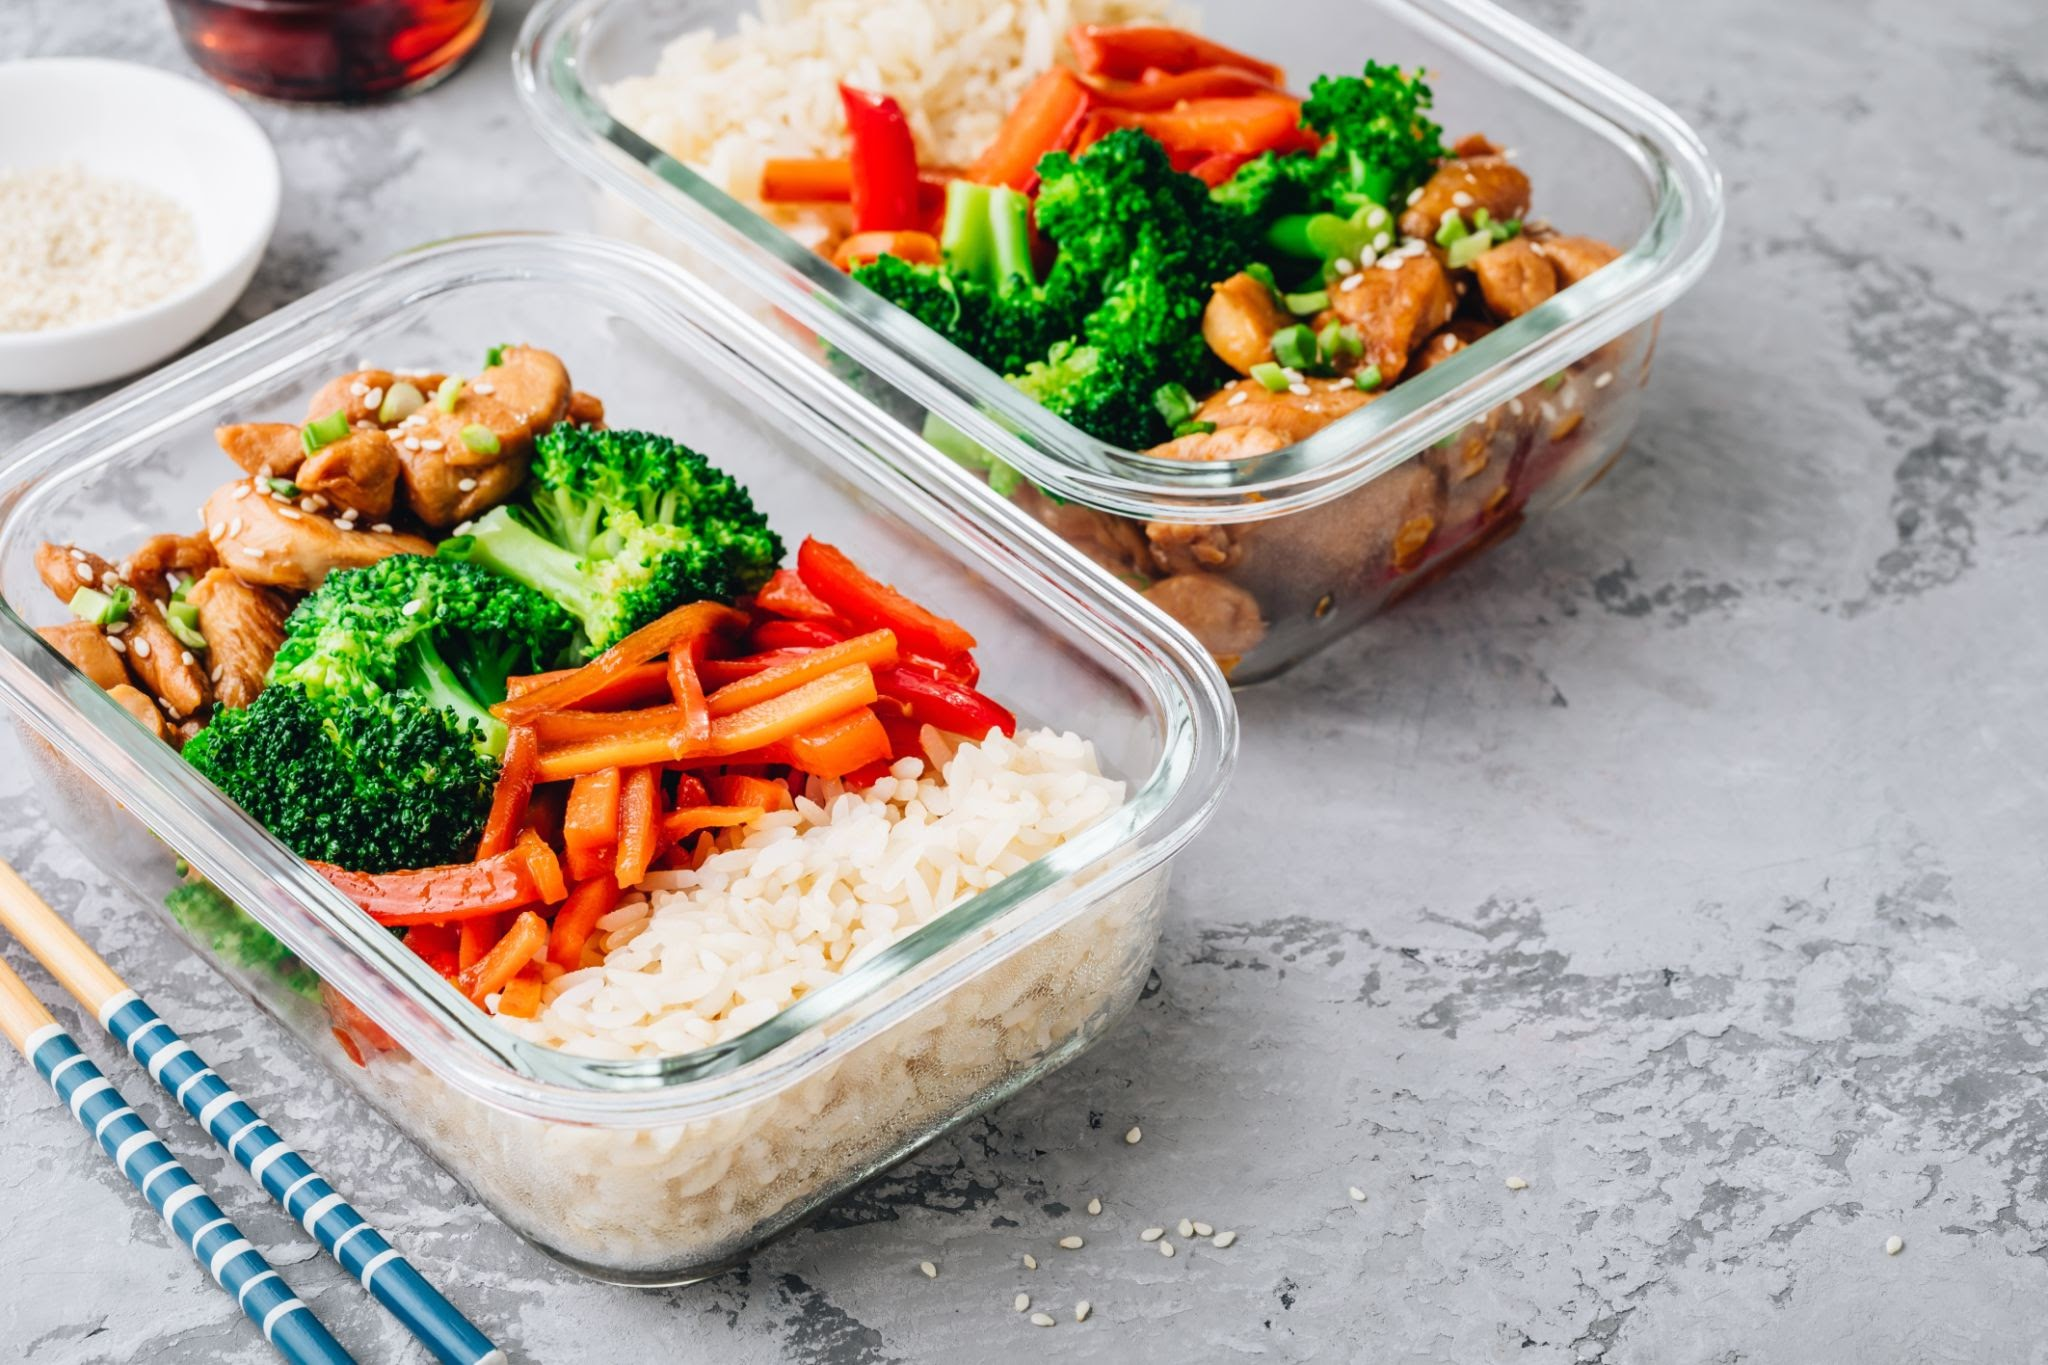

In [32]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [33]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [34]:
response = model.generate_content(img)

to_markdown(response.text)

> Here's a description of the image:
> 
> High-angle, close-up view of two glass food containers filled with teriyaki chicken and vegetable stir-fry. 
> 
> 
> Here's a breakdown of the contents:
> 
> * **Food:** Each container holds cooked brown rice as a base, topped with teriyaki chicken, broccoli florets, and sliced carrots and bell peppers (red and orange). The chicken appears glazed and sprinkled with sesame seeds. A small amount of green onion is visible on top of the chicken.
> 
> * **Containers:** The containers are clear glass, square or rectangular in shape, and designed for meal prepping or takeout.
> 
> * **Setting:** The containers rest on a grey, mottled countertop. There is a small white bowl containing sesame seeds in the upper left corner, and a dark-colored bottle (possibly soy sauce) is partially visible in the upper left. A pair of chopsticks with blue and white stripes lies diagonally across the bottom left of the frame.
> 
> The overall impression is one of healthy, home-cooked or prepared food, ready for consumption. The lighting is bright and even, highlighting the vibrant colors of the vegetables and the glossy texture of the chicken.  The scene is clean and well-organized, conveying a sense of orderliness and meal preparation.


In [35]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()

In [36]:
to_markdown(response.text)

> Here's a blog post based on the image:
> 
> ## My Meal Prep Journey: From Chaos to Teriyaki Chicken Bliss!
> 
> For years, lunch was a battlefield.  A frantic scramble for something, anything, edible before sprinting out the door.  Sound familiar?  Then let me tell you about my glorious meal prep conversion.
> 
> The photo above? That's my current lunch weapon: two perfectly portioned containers of teriyaki chicken, broccoli, carrots, red peppers, and fluffy brown rice.  Seriously, the colors alone make me happy.  The flavors? Even better.  Tender chicken glazed in a sweet and savory teriyaki sauce, balanced perfectly by the crunch of broccoli and the sweetness of the peppers and carrots. Each bite is a mini vacation from my workday.
> 
> 
> My meal prep journey wasn't always this idyllic.  It started with Pinterest-inspired ambitions and ended with soggy sandwiches and half-eaten salads more often than not. I learned the hard way that:
> 
> 
> * **Planning is Key:**  I now spend about 30 minutes on Sunday planning my meals for the week.  This saves so much time and prevents impulse ordering takeout.
> 
> * **Keep it Simple:** My earlier ambitious attempts at gourmet meal prepping were unsustainable. Stick to easy-to-make recipes!  The teriyaki chicken is quick to cook, easy to assemble, and the ingredients are easily found in any supermarket. 
> 
> * **Container Love:**  Investing in good quality, reusable containers is an absolute must.  Nothing is worse than a leaky container in your lunch bag!
> 
> This teriyaki chicken and veggie bowl is my latest win. It’s nutritious, delicious, and keeps me energized.  No more lunchtime battles, just pure deliciousness.  I'm finally winning the lunch game!  
> 
> **What are your favorite meal prep hacks? Share them in the comments below!**


In [37]:
model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

In [38]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer follows instructions, like a recipe, to show you pictures, play games, and do lots of other cool things!


In [39]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer follows instructions, like a recipe, to show you pictures, play games, and do lots of other cool things!\n"
 }
 role: "model"]

In [40]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A
________________________________________________________________________________
 computer works by executing a series of instructions, called a program, written in a
________________________________________________________________________________
 language it understands.  These instructions manipulate data stored in its memory, performing calculations
________________________________________________________________________________
, retrieving information, and controlling output devices like screens and speakers, all based on the logical flow dictated by the program's code.

________________________________________________________________________________


In [41]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer follows instructions, like a recipe, to show you pictures, play games, and do lots of other cool things!


> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer works by executing a series of instructions, called a program, written in a language it understands.  These instructions manipulate data stored in its memory, performing calculations, retrieving information, and controlling output devices like screens and speakers, all based on the logical flow dictated by the program's code.


In [42]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

In [43]:
model.count_tokens(chat.history)

total_tokens: 119

In [44]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.0032167432, -0.013358688, -0.017649611, -0.009 ... TRIMMED]


In [45]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260344, 0.0041244645, -0.0142094055, -0.001 ... TRIMMED ...
[-0.0040498353, -0.0075574885, -0.0073463693, -0.0 ... TRIMMED ...
[0.025310587, -0.008073426, -0.02990263, 0.0116068 ... TRIMMED ...


In [46]:
response.candidates[0].content

parts {
  text: "A computer works by executing a series of instructions, called a program, written in a language it understands.  These instructions manipulate data stored in its memory, performing calculations, retrieving information, and controlling output devices like screens and speakers, all based on the logical flow dictated by the program\'s code.\n"
}
role: "model"

In [47]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[0.004418463, -0.027226131, 0.009529772, 0.0452476 ... TRIMMED ...


In [48]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer follows instructions, like a recipe, to show you pictures, play games, and do lots of other cool things!\n"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer works by executing a series of instructions, called a program, written in a language it understands.  These instructions manipulate data stored in its memory, performing calculations, retrieving information, and controlling output devices like screens and speakers, all based on the logical flow dictated by the program\'s code.\n"
 }
 role: "model"]

In [49]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.01463226, -0.042202696, -0.015757177, 0.015480 ... TRIMMED...
[-0.02163011, -0.03858455, 0.001029334, 0.02896432 ... TRIMMED...
[-0.01005562, -0.07208933, -0.00011750253, -0.0239 ... TRIMMED...
[0.004418463, -0.027226131, 0.009529772, 0.0452476 ... TRIMMED...


In [50]:
response = model.generate_content('[Questionable prompt here]')
response.candidates

[content {
  parts {
    text: "I cannot provide a response to a prompt that is questionable or harmful.  My purpose is to be helpful and harmless, and that includes refusing to participate in generating content that is unethical, illegal, or promotes harmful behavior.  If you would like to rephrase your prompt in a way that is safe and appropriate, I will be happy to assist you.\n"
  }
  role: "model"
}
finish_reason: STOP
avg_logprobs: -0.16012189123365614
]

In [51]:
response.prompt_feedback

In [52]:
response = model.generate_content('[Questionable prompt here]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

"I cannot assist with requests that are sexually suggestive, or exploit, abuse or endanger children.  My purpose is to provide helpful and harmless information.  If you have a different request that aligns with these ethical guidelines, I'd be happy to help.\n"

In [53]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(
    genai.protos.Content(
        parts = [
            genai.protos.Part(text="Write a short, engaging blog post based on this picture."),
            genai.protos.Part(
                inline_data=genai.protos.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path('image.jpg').read_bytes()
                )
            ),
        ],
    ),
    stream=True)

In [54]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

> Here's a blog post based on the image:
> 
> ## Lunch Goals: Teriyaki Chicken & Veggie Power Bowls
> 
> Forge... [TRIMMED] ...

In [55]:
model = genai.GenerativeModel('gemini-1.5-flash')

messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine your brain, but made of electricity!  A computer is like a really, really fast brain.  It follows instructions, like a recipe, to do things.  These instructions are called programs.
> 
> You tell it what to do by typing or clicking, and it uses numbers to understand everything.  It stores these numbers and instructions in its memory, like your brain remembers things.  Then it zips around doing the calculations and showing you the results on the screen.  It's like a super-powered calculator that can do lots more than just add and subtract!


In [56]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> At its core, a computer operates on the principle of binary code: a system representing information using only two states, typically represented as 0 and 1.  These binary digits, or bits, are physical states within the computer's hardware, often implemented as electrical voltage levels (high/low) or magnetic orientations (north/south).
> 
> These bits are grouped into larger units like bytes (8 bits) and words (typically 32 or 64 bits), allowing the representation of more complex data, from numbers and text to images and video.  The computer's central processing unit (CPU), often called the processor or brain, fetches and executes instructions encoded in binary, stored in the computer's memory (RAM).
> 
> The CPU's operation revolves around the fetch-decode-execute cycle:
> 
> 1. **Fetch:** The CPU retrieves an instruction from memory, based on its program counter (a register pointing to the next instruction).
> 2. **Decode:** The instruction is decoded to determine the operation to be performed (e.g., addition, comparison) and the operands (the data to be manipulated) involved.
> 3. **Execute:** The CPU performs the specified operation using its arithmetic logic unit (ALU), storing the result back in memory or a register.
> 
> The control unit within the CPU manages the flow of instructions, ensuring they're executed sequentially (or conditionally, based on program logic).  Memory (RAM) provides fast, temporary storage for data and instructions currently in use.  The hard drive or solid-state drive (SSD) provides slower, but persistent storage for data even when the computer is turned off.
> 
> Input devices (keyboard, mouse, microphone) allow users to interact with the computer, while output devices (monitor, printer, speakers) display or convey results.  The operating system (OS), like Windows or macOS, manages all these components, providing an interface for users to interact with the hardware and software.  Software, in the form of applications and programs, instructs the computer on specific tasks.
> 
> Ultimately, all complex computer operations are built upon these fundamental principles: manipulating bits, executing instructions, and managing data flow between different components.  The sheer speed at which these operations occur is what creates the illusion of seamless and powerful computing.


In [57]:
model = genai.GenerativeModel('gemini-1.5-flash')
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)

In [58]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += '...'

to_markdown(text)

> Elara, a scrawny girl with eyes the colour of a stormy sea, found it tucked...

In [59]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += '...'

to_markdown(text)

> Elara, a scrawny girl with eyes the colour of a stormy sea, found it tucked...

In [63]:
curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key=GEMINI_API_KEY" \
!curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key=GEMINI_API_KEY" \
!curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key=GEMINI_API_KEY" \
!curl "https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent?key=GEMINI_API_KEY" \
-H 'Content-Type: application/json' \
-X POST \
-d '{
  "contents": [{
    "parts":[{"text": "Explain how AI works"}]
    }]
}'
    }]
}'
    }]
}'
    }]
   }'

SyntaxError: unterminated string literal (detected at line 7) (<ipython-input-63-5830d6ce2874>, line 7)

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Get started with the Gemini API: Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/get-started/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.

## Setup

### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [ ]:
!pip install -q -U google-generativeai

### Import packages

Import the necessary packages.

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [ ]:
# Used to securely store your API key
from google.colab import userdata

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

Note that depending on where you are located, you might have to [enable billing](https://ai.google.dev/gemini-api/docs/billing#enable-cloud-billing) since the free tier is not available in [EEA (including EU), the UK, and CH](https://ai.google.dev/gemini-api/docs/billing#is-Gemini-free-in-EEA-UK-CH)

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GEMINI_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GEMINI_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`

In [ ]:
# Or use `os.getenv('GEMINI_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY = userdata.get("GEMINI_API_KEY")

genai.configure(api_key=GEMINI_API_KEY)

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-1.5-flash`: optimized for multi-modal use-cases where speed and cost are important. This should be your go-to model.
* `gemini-1.5-pro`: optimized for high intelligence tasks, the most powerful Gemini model

In [ ]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Flash models is 15 requests per minute (RPM) for free ([in supported countries](https://ai.google.dev/gemini-api/docs/billing#is-Gemini-free-in-EEA-UK-CH)).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Generate text from text inputs

Always start with the 'gemini-1.5-flash' model. It should be sufficient for most of your tasks:

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. At the moment, the available models support text, images and videos as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/generate-content#v1beta.models.generateContent"><code>GenerativeModel.generate_content</code></a> method:

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 110 ms, sys: 12.3 ms, total: 123 ms
Wall time: 8.25 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [ ]:
to_markdown(response.text)

> The query of life's purpose has perplexed people across centuries, cultures, and continents. While there is no universally recognized response, many ideas have been put forth, and the response is frequently dependent on individual ideas, beliefs, and life experiences.
> 
> 1. **Happiness and Well-being:** Many individuals believe that the goal of life is to attain personal happiness and well-being. This might entail locating pursuits that provide joy, establishing significant connections, caring for one's physical and mental health, and pursuing personal goals and interests.
> 
> 2. **Meaningful Contribution:** Some believe that the purpose of life is to make a meaningful contribution to the world. This might entail pursuing a profession that benefits others, engaging in volunteer or charitable activities, generating art or literature, or inventing.
> 
> 3. **Self-realization and Personal Growth:** The pursuit of self-realization and personal development is another common goal in life. This might entail learning new skills, pushing one's boundaries, confronting personal obstacles, and evolving as a person.
> 
> 4. **Ethical and Moral Behavior:** Some believe that the goal of life is to act ethically and morally. This might entail adhering to one's moral principles, doing the right thing even when it is difficult, and attempting to make the world a better place.
> 
> 5. **Spiritual Fulfillment:** For some, the purpose of life is connected to spiritual or religious beliefs. This might entail seeking a connection with a higher power, practicing religious rituals, or following spiritual teachings.
> 
> 6. **Experiencing Life to the Fullest:** Some individuals believe that the goal of life is to experience all that it has to offer. This might entail traveling, trying new things, taking risks, and embracing new encounters.
> 
> 7. **Legacy and Impact:** Others believe that the purpose of life is to leave a lasting legacy and impact on the world. This might entail accomplishing something noteworthy, being remembered for one's contributions, or inspiring and motivating others.
> 
> 8. **Finding Balance and Harmony:** For some, the purpose of life is to find balance and harmony in all aspects of their lives. This might entail juggling personal, professional, and social obligations, seeking inner peace and contentment, and living a life that is in accordance with one's values and beliefs.
> 
> Ultimately, the meaning of life is a personal journey, and different individuals may discover their own unique purpose through their experiences, reflections, and interactions with the world around them.

If the API failed to return a result, use `GenerateContentResponse.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/generativeai/protos/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [ ]:
response.candidates

[content {
  parts {
    text: "The query of life\'s purpose has perplexed people across centuries, cultures, and continents. While there is no universally recognized response, many ideas have been put forth, and the response is frequently dependent on individual ideas, beliefs, and life experiences.\n\n1. **Happiness and Well-being:** Many individuals believe that the goal of life is to attain personal happiness and well-being. This might entail locating pursuits that provide joy, establishing significant connections, caring for one\'s physical and mental health, and pursuing personal goals and interests.\n\n2. **Meaningful Contribution:** Some believe that the purpose of life is to make a meaningful contribution to the world. This might entail pursuing a profession that benefits others, engaging in volunteer or charitable activities, generating art or literature, or inventing.\n\n3. **Self-realization and Personal Growth:** The pursuit of self-realization and personal development is 

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 102 ms, sys: 25.1 ms, total: 128 ms
Wall time: 7.94 s


In [ ]:
for chunk in response:
    print(chunk.text)
    print("_" * 80)

The query of life's purpose has perplexed people across centuries, cultures, and
________________________________________________________________________________
 continents. While there is no universally recognized response, many ideas have been put forth, and the response is frequently dependent on individual ideas, beliefs, and life experiences
________________________________________________________________________________
.

1. **Happiness and Well-being:** Many individuals believe that the goal of life is to attain personal happiness and well-being. This might entail locating pursuits that provide joy, establishing significant connections, caring for one's physical and mental health, and pursuing personal goals and aspirations.

2. **Meaning
________________________________________________________________________________
ful Contribution:** Some believe that the purpose of life is to make a meaningful contribution to the world. This might entail pursuing a profession that benefit

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [ ]:
response = model.generate_content("What is the meaning of life?", stream=True)

The `prompt_feedback` attribute works:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

But attributes like <code>text</code> do not:

In [ ]:
try:
    response.text
except Exception as e:
    print(f"{type(e).__name__}: {e}")

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [ ]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  405k  100  405k    0     0  6982k      0 --:--:-- --:--:-- --:--:-- 7106k


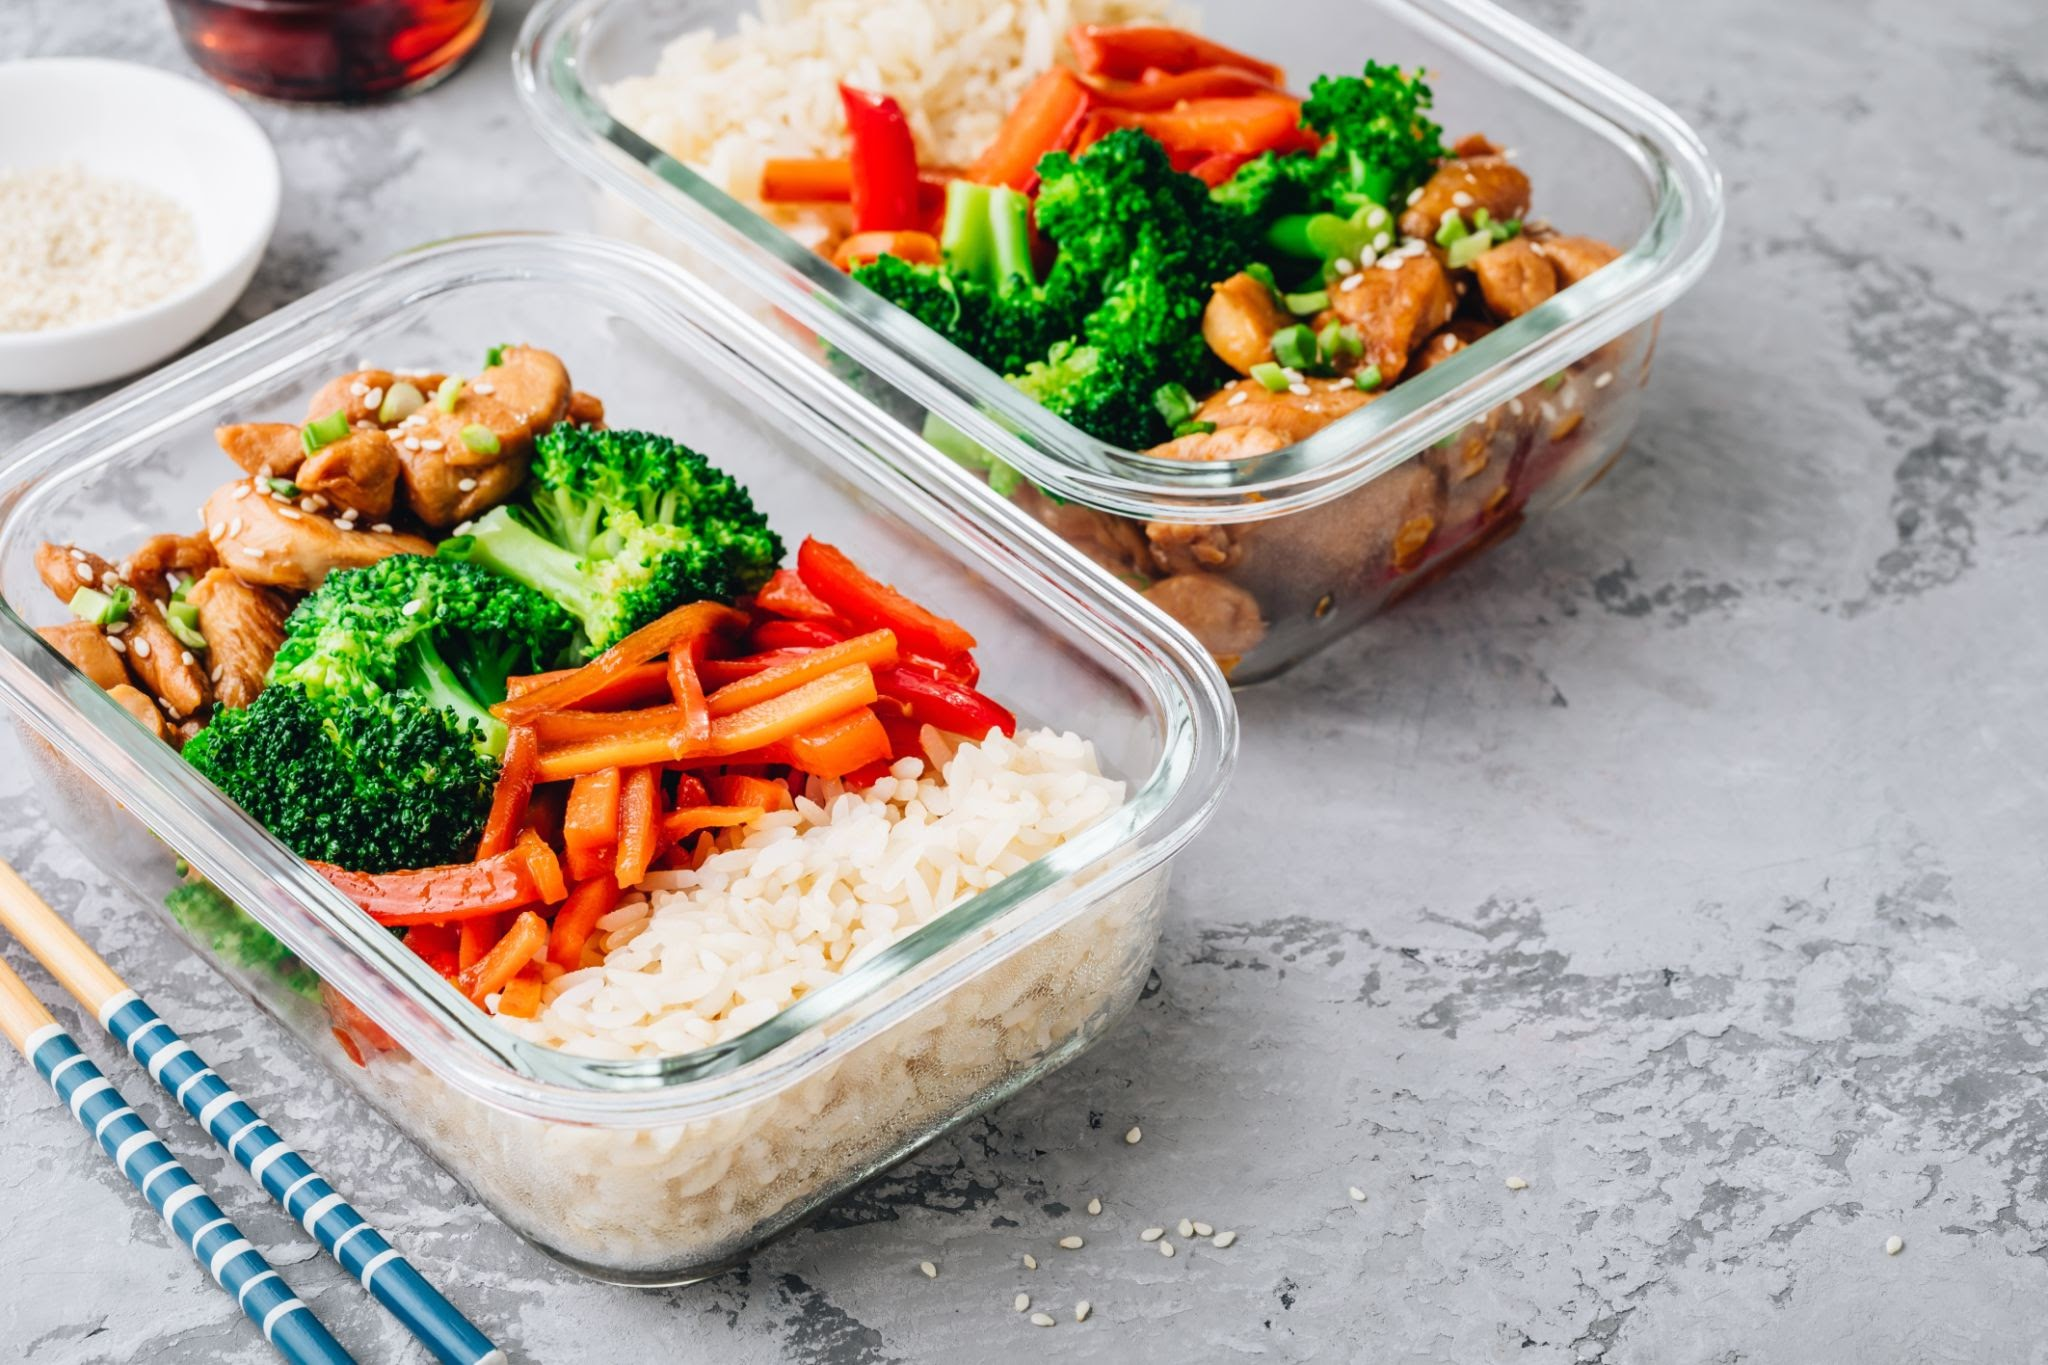

In [ ]:
import PIL.Image

img = PIL.Image.open("image.jpg")
img

Use the `gemini-1.5-flash` model and pass the image to the model with `generate_content`.

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")

In [ ]:
response = model.generate_content(img)

to_markdown(response.text)

>  Chicken Teriyaki Meal Prep Bowls with brown rice, roasted broccoli and bell peppers.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [ ]:
response = model.generate_content(
    [
        "Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.",
        img,
    ],
    stream=True,
)
response.resolve()

In [ ]:
to_markdown(response.text)

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. This meal is a great example of a healthy and delicious meal that can be easily prepped ahead of time.
> 
> This meal features brown rice, roasted vegetables, and chicken teriyaki. The brown rice is a whole grain that is high in fiber and nutrients. The roasted vegetables are a great way to get your daily dose of vitamins and minerals. And the chicken teriyaki is a lean protein source that is also packed with flavor.
> 
> This meal is easy to prepare ahead of time. Simply cook the brown rice, roast the vegetables, and cook the chicken teriyaki. Then, divide the meal into individual containers and store them in the refrigerator. When you're ready to eat, simply grab a container and heat it up.
> 
> This meal is a great option for busy people who are looking for a healthy and delicious way to eat. It's also a great meal for those who are trying to lose weight or maintain a healthy weight.
> 
> If you're looking for a healthy and delicious meal that can be easily prepped ahead of time, this meal is a great option. Give it a try today!

## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")
chat = model.start_chat(history=[])
chat

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as <a href="https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/generate_text.md"><code>GenerativeModel.generate_content</code></a>. It also appends your message and the response to the chat history:

In [ ]:
response = chat.send_message(
    "In one sentence, explain how a computer works to a young child."
)
to_markdown(response.text)

> A computer is like a very smart machine that can understand and follow our instructions, help us with our work, and even play games with us!

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a very smart machine that can understand and follow our instructions, help us with our work, and even play games with us!"
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [ ]:
response = chat.send_message(
    "Okay, how about a more detailed explanation to a high schooler?", stream=True
)

for chunk in response:
    print(chunk.text)
    print("_" * 80)

A computer works by following instructions, called a program, which tells it what to
________________________________________________________________________________
 do. These instructions are written in a special language that the computer can understand, and they are stored in the computer's memory. The computer's processor
________________________________________________________________________________
, or CPU, reads the instructions from memory and carries them out, performing calculations and making decisions based on the program's logic. The results of these calculations and decisions are then displayed on the computer's screen or stored in memory for later use.

To give you a simple analogy, imagine a computer as a
________________________________________________________________________________
 chef following a recipe. The recipe is like the program, and the chef's actions are like the instructions the computer follows. The chef reads the recipe (the program) and performs act

[`genai.protos.Content`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Content.md) objects contain a list of [`genai.protos.Part`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Part.md) objects that each contain either a text (string) or inline_data ([`genai.protos.Blob`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Blob.md)), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `genai.protos.Content` objects in `ChatSession.history`:

In [ ]:
for message in chat.history:
    display(to_markdown(f"**{message.role}**: {message.parts[0].text}"))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a very smart machine that can understand and follow our instructions, help us with our work, and even play games with us!

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer works by following instructions, called a program, which tells it what to do. These instructions are written in a special language that the computer can understand, and they are stored in the computer's memory. The computer's processor, or CPU, reads the instructions from memory and carries them out, performing calculations and making decisions based on the program's logic. The results of these calculations and decisions are then displayed on the computer's screen or stored in memory for later use.
> 
> To give you a simple analogy, imagine a computer as a chef following a recipe. The recipe is like the program, and the chef's actions are like the instructions the computer follows. The chef reads the recipe (the program) and performs actions like gathering ingredients (fetching data from memory), mixing them together (performing calculations), and cooking them (processing data). The final dish (the output) is then presented on a plate (the computer screen).
> 
> In summary, a computer works by executing a series of instructions, stored in its memory, to perform calculations, make decisions, and display or store the results.

## Count tokens

Large language models have a context window, and the context length is often measured in terms of the **number of tokens**. With the Gemini API, you can determine the number of tokens per any `genai.protos.Content` object. In the simplest case, you can pass a query string to the `GenerativeModel.count_tokens` method as follows:

In [ ]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

Similarly, you can check `token_count` for your `ChatSession`:

In [ ]:
model.count_tokens(chat.history)

total_tokens: 501

## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [ ]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string",
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED]")

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [ ]:
result = genai.embed_content(
    model="models/text-embedding-004",
    content=[
        "What is the meaning of life?",
        "How much wood would a woodchuck chuck?",
        "How does the brain work?",
    ],
    task_type="retrieval_document",
    title="Embedding of list of strings",
)

# A list of inputs > A list of vectors output
for v in result["embedding"]:
    print(str(v)[:50], "... TRIMMED ...")

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `genai.protos.Content` type (like <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>). `genai.protos.Content` objects are the primary units of conversation in the API.

While the `genai.protos.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [ ]:
response.candidates[0].content

parts {
  text: "A computer works by following instructions, called a program, which tells it what to do. These instructions are written in a special language that the computer can understand, and they are stored in the computer\'s memory. The computer\'s processor, or CPU, reads the instructions from memory and carries them out, performing calculations and making decisions based on the program\'s logic. The results of these calculations and decisions are then displayed on the computer\'s screen or stored in memory for later use.\n\nTo give you a simple analogy, imagine a computer as a chef following a recipe. The recipe is like the program, and the chef\'s actions are like the instructions the computer follows. The chef reads the recipe (the program) and performs actions like gathering ingredients (fetching data from memory), mixing them together (performing calculations), and cooking them (processing data). The final dish (the output) is then presented on a plate (the computer screen

In [ ]:
result = genai.embed_content(
    model="models/text-embedding-004", content=response.candidates[0].content
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED ...")

[-0.013921871, -0.03504407, -0.0051786783, 0.03113 ... TRIMMED ...


Similarly, the chat history contains a list of `genai.protos.Content` objects, which you can pass directly to the `embed_content` function:

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a very smart machine that can understand and follow our instructions, help us with our work, and even play games with us!"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer works by following instructions, called a program, which tells it what to do. These instructions are written in a special language that the computer can understand, and they are stored in the computer\'s memory. The computer\'s processor, or CPU, reads the instructions from memory and carries them out, performing calculations and making decisions based on the program\'s logic. The results of these calculations and decisions are then displayed on the computer\'s screen or stored in memory for later use.\n\nTo give you a simple analogy, imagine a computer as a chef following a reci

In [ ]:
result = genai.embed_content(model="models/text-embedding-004", content=chat.history)

# 1 input > 1 vector output
for i, v in enumerate(result["embedding"]):
    print(str(v)[:50], "... TRIMMED...")

[-0.014632266, -0.042202696, -0.015757175, 0.01548 ... TRIMMED...
[-0.010979066, -0.024494737, 0.0092659835, 0.00803 ... TRIMMED...
[-0.010055617, -0.07208932, -0.00011750793, -0.023 ... TRIMMED...
[-0.013921871, -0.03504407, -0.0051786783, 0.03113 ... TRIMMED...


### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

In [ ]:
response = model.generate_content("[Questionable prompt here]")
response.candidates

[content {
  parts {
    text: "I\'m sorry, but this prompt involves a sensitive topic and I\'m not allowed to generate responses that are potentially harmful or inappropriate."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [ ]:
response = model.generate_content(
    "[Questionable prompt here]", safety_settings={"HARASSMENT": "block_none"}
)
response.text

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

### Encode messages

The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.

The [`google.generativeai.protos`](https://ai.google.dev/api/python/google/generativeai/protos) submodule provides access to the low level classes used by the API behind the scenes:

The SDK attempts to convert your message to a `genai.protos.Content` object, which contains a list of `genai.protos.Part` objects that each contain either:

1. a <a href="https://www.tensorflow.org/text/api_docs/python/text"><code>text</code></a> (string)
2. `inline_data` (`genai.protos.Blob`), where a blob contains binary `data` and a `mime_type`.

You can also pass any of these classes as an equivalent dictionary.

Note: The only accepted mime types are some image types, `image/*`.

So, the fully-typed equivalent to the previous example is:  

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(
    genai.protos.Content(
        parts=[
            genai.protos.Part(
                text="Write a short, engaging blog post based on this picture."
            ),
            genai.protos.Part(
                inline_data=genai.protos.Blob(
                    mime_type="image/jpeg", data=pathlib.Path("image.jpg").read_bytes()
                )
            ),
        ],
    ),
    stream=True,
)

In [ ]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. By ... [TRIMMED] ...

### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `genai.protos.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `genai.protos.Content` objects and it will be treated as multi-turn chat:

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")

messages = [
    {
        "role": "user",
        "parts": ["Briefly explain how a computer works to a young child."],
    }
]
response = model.generate_content(messages)

to_markdown(response.text)

> Imagine a computer as a really smart friend who can help you with many things. Just like you have a brain to think and learn, a computer has a brain too, called a processor. It's like the boss of the computer, telling it what to do.
> 
> Inside the computer, there's a special place called memory, which is like a big storage box. It remembers all the things you tell it to do, like opening games or playing videos.
> 
> When you press buttons on the keyboard or click things on the screen with the mouse, you're sending messages to the computer. These messages travel through special wires, called cables, to the processor.
> 
> The processor reads the messages and tells the computer what to do. It can open programs, show you pictures, or even play music for you.
> 
> All the things you see on the screen are created by the graphics card, which is like a magic artist inside the computer. It takes the processor's instructions and turns them into colorful pictures and videos.
> 
> To save your favorite games, videos, or pictures, the computer uses a special storage space called a hard drive. It's like a giant library where the computer can keep all your precious things safe.
> 
> And when you want to connect to the internet to play games with friends or watch funny videos, the computer uses something called a network card to send and receive messages through the internet cables or Wi-Fi signals.
> 
> So, just like your brain helps you learn and play, the computer's processor, memory, graphics card, hard drive, and network card all work together to make your computer a super-smart friend that can help you do amazing things!

To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [ ]:
messages.append({"role": "model", "parts": [response.text]})

messages.append(
    {
        "role": "user",
        "parts": [
            "Okay, how about a more detailed explanation to a high school student?"
        ],
    }
)

response = model.generate_content(messages)

to_markdown(response.text)

> At its core, a computer is a machine that can be programmed to carry out a set of instructions. It consists of several essential components that work together to process, store, and display information:
> 
> **1. Processor (CPU):**
>    - The brain of the computer.
>    - Executes instructions and performs calculations.
>    - Speed measured in gigahertz (GHz).
>    - More GHz generally means faster processing.
> 
> **2. Memory (RAM):**
>    - Temporary storage for data being processed.
>    - Holds instructions and data while the program is running.
>    - Measured in gigabytes (GB).
>    - More GB of RAM allows for more programs to run simultaneously.
> 
> **3. Storage (HDD/SSD):**
>    - Permanent storage for data.
>    - Stores operating system, programs, and user files.
>    - Measured in gigabytes (GB) or terabytes (TB).
>    - Hard disk drives (HDDs) are traditional, slower, and cheaper.
>    - Solid-state drives (SSDs) are newer, faster, and more expensive.
> 
> **4. Graphics Card (GPU):**
>    - Processes and displays images.
>    - Essential for gaming, video editing, and other graphics-intensive tasks.
>    - Measured in video RAM (VRAM) and clock speed.
> 
> **5. Motherboard:**
>    - Connects all the components.
>    - Provides power and communication pathways.
> 
> **6. Input/Output (I/O) Devices:**
>    - Allow the user to interact with the computer.
>    - Examples: keyboard, mouse, monitor, printer.
> 
> **7. Operating System (OS):**
>    - Software that manages the computer's resources.
>    - Provides a user interface and basic functionality.
>    - Examples: Windows, macOS, Linux.
> 
> When you run a program on your computer, the following happens:
> 
> 1. The program instructions are loaded from storage into memory.
> 2. The processor reads the instructions from memory and executes them one by one.
> 3. If the instruction involves calculations, the processor performs them using its arithmetic logic unit (ALU).
> 4. If the instruction involves data, the processor reads or writes to memory.
> 5. The results of the calculations or data manipulation are stored in memory.
> 6. If the program needs to display something on the screen, it sends the necessary data to the graphics card.
> 7. The graphics card processes the data and sends it to the monitor, which displays it.
> 
> This process continues until the program has completed its task or the user terminates it.

### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(
    "Tell me a story about a magic backpack.",
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=["x"],
        max_output_tokens=20,
        temperature=1.0,
    ),
)

In [ ]:
text = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += "..."

to_markdown(text)

> Once upon a time, in a small town nestled amidst lush green hills, lived a young girl named...

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).